# LinkedIn Learning
# Faster Pandas

## 5. Saving Memory

### A. Measuring Memory

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('taxi.csv.xz')

In [3]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [4]:
df.memory_usage()

Index                        132
VendorID                 3999992
tpep_pickup_datetime     3999992
tpep_dropoff_datetime    3999992
passenger_count          3999992
trip_distance            3999992
RatecodeID               3999992
store_and_fwd_flag       3999992
PULocationID             3999992
DOLocationID             3999992
payment_type             3999992
fare_amount              3999992
extra                    3999992
mta_tax                  3999992
tip_amount               3999992
tolls_amount             3999992
improvement_surcharge    3999992
total_amount             3999992
dtype: int64

In [5]:
df.memory_usage(deep=True)

Index                         132
VendorID                  3999992
tpep_pickup_datetime     33999932
tpep_dropoff_datetime    33999932
passenger_count           3999992
trip_distance             3999992
RatecodeID                3999992
store_and_fwd_flag       24999950
PULocationID              3999992
DOLocationID              3999992
payment_type              3999992
fare_amount               3999992
extra                     3999992
mta_tax                   3999992
tip_amount                3999992
tolls_amount              3999992
improvement_surcharge     3999992
total_amount              3999992
dtype: int64

In [6]:
mb = 2 ** 20


In [7]:
df.memory_usage(deep=True) / mb

Index                     0.000126
VendorID                  3.814690
tpep_pickup_datetime     32.424862
tpep_dropoff_datetime    32.424862
passenger_count           3.814690
trip_distance             3.814690
RatecodeID                3.814690
store_and_fwd_flag       23.841810
PULocationID              3.814690
DOLocationID              3.814690
payment_type              3.814690
fare_amount               3.814690
extra                     3.814690
mta_tax                   3.814690
tip_amount                3.814690
tolls_amount              3.814690
improvement_surcharge     3.814690
total_amount              3.814690
dtype: float64

In [8]:
df.memory_usage(deep=True).sum() / mb

142.09731483459473

In [9]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
df['total_amount'].max()

456.35

In [11]:
df['total_amount'].memory_usage(deep=True)/mb

3.8148155212402344

In [12]:
ta32 = df['total_amount'].astype('float32')

In [13]:
ta32.memory_usage(deep=True)/mb

1.907470703125

### B. Loading parts of Data

In [14]:
df.memory_usage(deep=True).sum()/mb

142.09731483459473

In [15]:
df = pd.read_csv('taxi.csv.xz', usecols =['VendorID', 'total_amount'])

In [16]:
df.memory_usage(deep=True).sum()/mb

7.629505157470703

In [17]:
df = pd.read_csv('taxi.csv.xz', usecols =['VendorID', 'total_amount'] , chunksize = 100_000)

In [18]:
df

In [19]:
for df in pd.read_csv('taxi.csv.xz', usecols =['VendorID', 'total_amount'] , chunksize = 100_000):
    print(len(df))

100000
100000
100000
100000
99999


In [20]:
revs = []
for df in pd.read_csv('taxi.csv.xz', usecols =['VendorID', 'total_amount'] , chunksize = 100_000):
    rev = df.groupby('VendorID').sum()
    revs.append(rev)

In [21]:
pd.concat(revs).groupby(level=0).sum()

,total_amount
VendorID,
1,3549029.11
2,4754096.58
4,64.86


### C. Categorical Data

In [22]:
df = pd.read_csv('taxi.csv.xz')

In [23]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [24]:
df['VendorID'].sample(10)

343946    2
78446     1
385652    2
228302    2
370855    2
394774    1
187828    2
452328    1
430756    2
408138    2
Name: VendorID, dtype: int64

In [25]:
vendor_name = {
    1 : 'Creative', 
    2 : 'VeriFone',
    4 : 'BigApple'
}

In [26]:
vendors = df['VendorID'].map(vendor_name)

In [27]:
vendors.sample(5)

262371    Creative
8491      Creative
197112    Creative
293278    Creative
150244    VeriFone
Name: VendorID, dtype: object

In [28]:
cat_vendors = vendors.astype('category')

In [29]:
cat_vendors.sample(5)

301156    VeriFone
326158    Creative
239483    Creative
451733    Creative
490691    Creative
Name: VendorID, dtype: category
Categories (3, object): ['BigApple', 'Creative', 'VeriFone']

In [30]:
cat_vendors.memory_usage(deep = True) / vendors.memory_usage(deep = True)

0.017558199408247172

### D. Challenge 5 --> Reducing Memory

In [31]:
"""Calculate the minimal and maximal distance driven from the data at
    taxi.csv.xz
Consume as little memory as possible and don't load more than 50,000 rows at a
time.
"""

import pandas as pd

min_dist, max_dist = float('inf'), float('-inf')
dfs = pd.read_csv('taxi.csv.xz', usecols=['trip_distance'], chunksize=50_000)
for df in dfs:
    desc = df['trip_distance'].describe()
    min_dist = min(min_dist, desc['min'])
    max_dist = max(max_dist, desc['max'])

print('min', min_dist, 'max', max_dist)

min 0.0 max 111.1


## 5. Fast Serialization 

### A. Optimizing with SQL

In [32]:
import sqlite3

In [33]:
conn = sqlite3.connect('bikes.db')

In [34]:
query = '''
    SELECT name, sql
    FROM sqlite_master
    WHERE type = 'table'
'''

In [35]:
for name, sql in conn.execute(query):
    print(name)
    print(sql)

bike_rides
CREATE TABLE bike_rides(
  year INT,
  month INT,
  day INT,
  trip_id INT,
  bike_id INT,
  duration INT
)


In [36]:
conn.execute('SELECT MAX(year), MIN(year) FROM bike_rides').fetchall()

[(2017, 2016)]

In [37]:
query = '''
    SELECT year, month, duration
    FROM bike_rides
    WHERE year == 2016 OR year == 2017
'''

In [38]:
df = pd.read_sql(query, conn)

In [39]:
df.groupby(['year', 'month'])['duration'].median()

year  month
2016  1        14.0
      2        15.0
      3        14.0
      5        15.0
      6        14.0
      7        15.0
      8        13.0
      9        15.0
      10       16.0
      11       14.0
2017  1        14.0
      2        16.0
      3        14.0
      4        18.0
      5        18.0
      6        16.0
      7        16.0
      8        13.0
      9        17.0
      10       16.0
      11       18.0
      12       16.0
Name: duration, dtype: float64

### B. Optimizing with HDF5

In [40]:
!pip install tables

In [41]:
store = pd.HDFStore('stocks.h5')

In [42]:
store.keys()

['/stocks']

In [43]:
df = store['stocks']

In [44]:
df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

In [45]:
store.select('stocks', stop = 3)

,symbol,open,high,low,close,adj close,volume
date,,,,,,,
1962-01-02,IBM,7.713333,7.713333,7.626667,7.626667,0.609973,387200.0
1962-01-03,IBM,7.626667,7.693333,7.626667,7.693333,0.615304,288000.0
1962-01-04,IBM,7.693333,7.693333,7.613333,7.616667,0.609173,256000.0


In [46]:
s = store.get_storer('stocks')

In [47]:
s.nrows

88839

In [48]:
df = store.select('stocks', '(index >= "2010") & (index < "2012")')

In [49]:
df.index.min(), df.index.max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2011-12-30 00:00:00'))

In [50]:
df = store.select('stocks', '(index >= "2010") & (index < "2012")', columns = ['symbol', 'close', 'volume'])

In [51]:
df.columns

Index(['symbol', 'close', 'volume'], dtype='object')

### C. Challenge 6 --> Bike Ride Duration

In [52]:
"""Using "bikes.db", find the 5 bikes (using "bike_id") that has the biggest
90% quantile of ride duration in the first quarter of 2017.
"""
import sqlite3

import pandas as pd

conn = sqlite3.connect('bikes.db')
sql = '''
SELECT bike_id, duration
FROM bike_rides
WHERE year == 2017 AND month < 4
'''
df = pd.read_sql(sql, conn)
out = df.groupby('bike_id')['duration'].quantile(.9)
print(out.sort_values(ascending=False)[:5])

bike_id
393    124.6
68     111.2
832    100.6
326     96.6
429     96.0
Name: duration, dtype: float64


## 7. Numba and Cython

### A. What is numba?

In [53]:
!pip install numba

In [54]:
def add(a,b):
    return a + b

In [55]:
import dis

In [56]:
dis.dis(add)

  1           0 RESUME                   0

  2           2 LOAD_FAST                0 (a)
              4 LOAD_FAST                1 (b)
              6 BINARY_OP                0 (+)
             10 RETURN_VALUE


In [57]:
import numba

In [58]:
@numba.jit
def jit_add(a,b):
    return a + b

In [59]:
type(jit_add)

numba.core.registry.CPUDispatcher

In [60]:
jit_add.overloads

OrderedDict()

In [61]:
jit_add(1,2)

3

In [62]:
jit_add.overloads.keys()

odict_keys([(int64, int64)])

In [63]:
fn = jit_add.get_overload((numba.int64, numba.int64))

In [64]:
type(fn)

builtin_function_or_method

In [65]:
fn(1,2)

3

In [66]:
jit_add(1.0, 2.0)

3.0

In [67]:
jit_add.overloads.keys()

odict_keys([(int64, int64), (float64, float64)])

### B. Using Numba

In [68]:
import numpy as np

In [69]:
s = pd.Series(np.random.randint(-3, 200, 1_000_000))

In [70]:
def relu(n):
    if n < 0:
        return 0
    return n

In [71]:
%timeit s.apply(relu)

372 ms ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
@numba.vectorize
def vect_relu(n):
    if n < 0:
        return 0
    return n

In [73]:
vect_relu(3)

3

In [74]:
vect_relu(pd.Series([-1,2,3]))

0    0
1    2
2    3
dtype: int64

In [75]:
np.allclose(s.apply(relu), vect_relu(s))

True

In [76]:
%timeit vect_relu(s)

4.03 ms ± 499 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [77]:
439 / 4.09

107.33496332518338

### C. Writing Cython Code

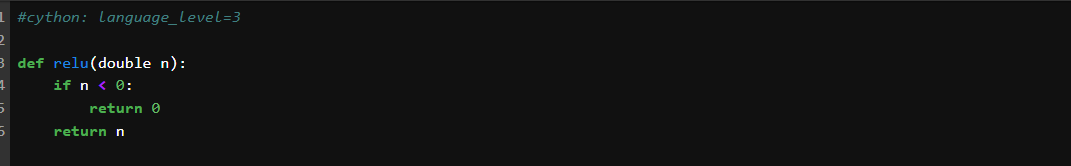

In [78]:
!pip install Cython

### D. Compiling Cython

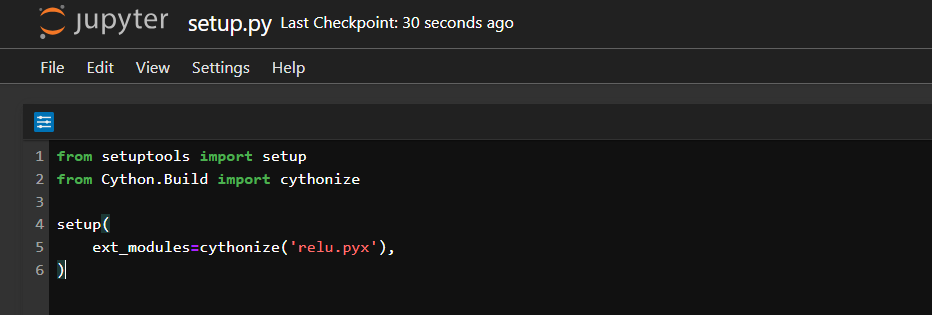

In [79]:
!python setup.py build_ext --inplace

running build_ext
building 'relu' extension
creating build
creating build\temp.win-amd64-cpython-312
creating build\temp.win-amd64-cpython-312\Release
"C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.42.34433\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -IC:\Users\Advait\anaconda3\include -IC:\Users\Advait\anaconda3\Include "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.42.34433\include" "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.42.34433\ATLMFC\include" "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\um" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\shared" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\winrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\cppwinr

In [82]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 9003-B1A4

 Directory of C:\Users\Advait\Desktop\LinkedIn Learning HSBC\Faster Pandas

04-02-2025  21:00    <DIR>          .
04-02-2025  21:00    <DIR>          ..
01-02-2025  10:49    <DIR>          .benchmarks
03-02-2025  21:52    <DIR>          .ipynb_checkpoints
01-02-2025  10:49    <DIR>          .pytest_cache
01-02-2025  14:16        13,093,876 austin-bikes.csv.xz
01-02-2025  14:16             7,502 austin-kiosk.csv
01-02-2025  11:24        16,973,552 bids.csv
03-02-2025  21:20         9,052,160 bikes.db
04-02-2025  21:00    <DIR>          build
01-02-2025  11:33               139 cart.csv
01-02-2025  14:18           191,016 Faster Pandas_1.ipynb
04-02-2025  21:00            77,337 Faster Pandas_2.ipynb
01-02-2025  12:42           377,452 ips.txt.xz
01-02-2025  12:02             9,560 log.txt.xz
01-02-2025  11:36                 0 logs.db
01-02-2025  12:29            74,580 logs_1.csv.xz
01-02-2025  11:38           897,024 lo

In [85]:
import relu1

In [86]:
%timeit relu1.relu(12)

82.4 ns ± 6.98 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [87]:
import relu

In [88]:
relu

<module 'relu' from 'C:\\Users\\Advait\\Desktop\\LinkedIn Learning HSBC\\Faster Pandas\\relu.cp312-win_amd64.pyd'>

In [89]:
%timeit relu.relu(12)

75.3 ns ± 5.06 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### E. %%cython magic

In [90]:
def relu(n):
    if n < 0:
        return 0
    return n

In [91]:
%timeit relu(-3.4)

92.8 ns ± 4.5 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [92]:
%load_ext cython

In [93]:
%%cython 
def cy_relu(double n):
    if n < 0:
        return 0
    return n

Content of stdout:
_cython_magic_d40d84a233797f20e35168bdc005e5e3524d71c6.c
   Creating library C:\Users\Advait\.ipython\cython\Users\Advait\.ipython\cython\_cython_magic_d40d84a233797f20e35168bdc005e5e3524d71c6.cp312-win_amd64.lib and object C:\Users\Advait\.ipython\cython\Users\Advait\.ipython\cython\_cython_magic_d40d84a233797f20e35168bdc005e5e3524d71c6.cp312-win_amd64.exp
Generating code
Finished generating code

In [94]:
cy_relu(3.4)

3.4

In [95]:
cy_relu(-3.4)

0

In [96]:
%timeit cy_relu(-3.4)

47 ns ± 3.96 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [97]:
92.8 / 47

1.974468085106383

### F. Challenge 7 --> Cython Speed Up

In [98]:
s = pd.Series(range(1_000_000))

In [99]:
%run second.py

In [100]:
%timeit second(s)

148 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [101]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [103]:
%%cython
def cy_second(values):
    top, second = values[0], values[1]
    for value in values[2:]:
        if value > top:
            top, second = value, top
        elif value > second:
            second = value
    return second

Content of stdout:
_cython_magic_166b12832a26bb399b26d00daf35e3121a4c473b.c
   Creating library C:\Users\Advait\.ipython\cython\Users\Advait\.ipython\cython\_cython_magic_166b12832a26bb399b26d00daf35e3121a4c473b.cp312-win_amd64.lib and object C:\Users\Advait\.ipython\cython\Users\Advait\.ipython\cython\_cython_magic_166b12832a26bb399b26d00daf35e3121a4c473b.cp312-win_amd64.exp
Generating code
Finished generating code

In [104]:
cy_second(s) == second(s)

True

In [105]:
%timeit cy_second(s)

126 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [106]:
148 / 126

1.1746031746031746

## 8. Alternative DataFrames

### A. Using Dask

In [107]:
!pip install "dask[complete]"

In [1]:
import dask.dataframe as dd

In [2]:
df = dd.read_csv('*.csv.xz', compression = 'lzma', blocksize = None)

In [3]:
df

,origin,time,method,path,status_code,size
npartitions=5,,,,,,
,string,string,string,string,int64,int64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [4]:
len(df)

1000000

In [5]:
df.groupby('status_code')['size'].count()

Dask Series Structure:
npartitions=1
    int64
      ...
Dask Name: count, 3 expressions
Expr=Count(frame=ReadCSV(a0f9b58)[['status_code', 'size']], observed=False, _slice='size')

In [6]:
df.groupby('status_code')['size'].count().compute()

status_code
200    893702
302     27783
304     72942
403        18
404      5550
501         4
500         1
Name: size, dtype: int64